Linear Regression
=============

Assignment 1
------------

The objective of this assignment is to learn how to apply a linear regression algorithm on the iris data set.

This notebook uses the [iris](https://archive.ics.uci.edu/ml/datasets/Iris) dataset to be used with python experiments. This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
First we would like to load this data set and visulasation the distribution using the two first two features.

['target_names', 'data', 'target', 'DESCR', 'feature_names']
['setosa' 'versicolor' 'virginica']


([], <a list of 0 Text yticklabel objects>)

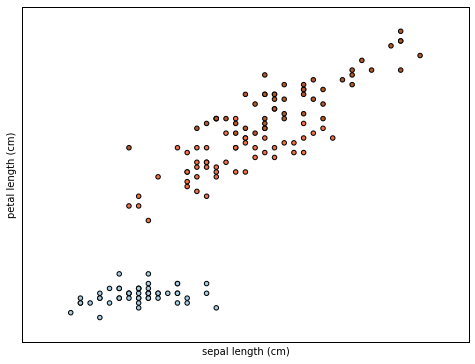

In [5]:
import matplotlib.pyplot as plt
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline 

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
print iris.keys()
print target_names
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 2], c=y, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[2])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


In this assignment, we would like to predict the length of petal by using the length of sepal. In this case, the "sepal length" is the input value and the "petal length" is the target value. In order to apply the Machine Learning algotirthm in the h2o, first we need to import the H2o library and initialization the H2o flow. See the installation document, if the "h2o" is not installed in Python.

In [6]:
import h2o
#Use help to get the details of the using function
help(h2o.init)

Help on function init in module h2o.h2o:

init(url=None, ip=None, port=None, https=None, insecure=False, username=None, password=None, cluster_name=None, proxy=None, start_h2o=True, nthreads=-1, ice_root=None, enable_assertions=True, max_mem_size=None, min_mem_size=None, strict_version_check=True, **kwargs)
    Attempt to connect to a local server, or if not successful start a new server and connect to it.
    
    :param url:
    :param ip:
    :param port:
    :param https:
    :param insecure:
    :param username:
    :param password:
    :param cluster_name:
    :param proxy:
    :param start_h2o:
    :param nthreads:
    :param ice_root:
    :param enable_assertions:
    :param max_mem_size:
    :param min_mem_size:
    :param strict_version_check:
    :param kwargs: (all other deprecated attributes)
    :returns: nothing



In [7]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


If everything works, an H2o instance will be lanunch at http://localhost:54321. By taping this adress in your web browser, we can observe that the H2o Web UI is in place. We can directly develop the ML algorithm by using the Web UI. But for this assignment, we use the H2o's API for python.
![title](./h2o_flow.png)

This demo is provided by H2o, you can also entre "h2o.demo("glm")" to run this demo in your console. The demo is for a classification problem, but the principale remains the same. 

In [8]:
# Upload the prostate dataset
prostate =  h2o.import_file(path="https://h2o-public-test-data.s3.amazonaws.com/smalldata/logreg/prostate.csv")

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [9]:
# Print a description of the prostate data
prostate.summary()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
type,int,int,int,int,int,int,real,real,int
mins,1.0,0.0,43.0,0.0,1.0,1.0,0.3,0.0,0.0
mean,190.5,0.402631578947,66.0394736842,1.08684210526,2.27105263158,1.10789473684,15.4086315789,15.8129210526,6.38421052632
maxs,380.0,1.0,79.0,2.0,4.0,2.0,139.7,97.6,9.0
sigma,109.840793879,0.491074338963,6.52707126917,0.308773258025,1.00010761815,0.310656449351,19.9975726686,18.3476199673,1.09195337443
zeros,0,227,0,3,0,0,0,167,2
missing,0,0,0,0,0,0,0,0,0
0,1.0,0.0,65.0,1.0,2.0,1.0,1.4,0.0,6.0
1,2.0,0.0,72.0,1.0,3.0,2.0,6.7,0.0,7.0
2,3.0,0.0,70.0,1.0,1.0,2.0,4.9,0.0,6.0


In [10]:
# Randomly split the dataset into ~70/30, training/test sets
r = prostate[0].runif()
train = prostate[r < 0.70]
test = prostate[r >= 0.70]

In [11]:
# Convert the response columns to factors (for binary classification problems)
train["CAPSULE"] = train["CAPSULE"].asfactor()
test["CAPSULE"] = test["CAPSULE"].asfactor()


In [12]:
# Build a (classification) GLM
from h2o.estimators import H2OGeneralizedLinearEstimator
prostate_glm = H2OGeneralizedLinearEstimator(family="binomial", alpha=[0.5])
prostate_glm.train(x=["AGE", "RACE", "PSA", "VOL", "GLEASON"],y="CAPSULE", training_frame=train)

glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


In [13]:
# Show the model
prostate_glm.show()

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1473863160481_1
GLM Model: summary



,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,binomial,logit,"Elastic Net (alpha = 0.5, lambda = 4.568E-4 )",5,5,4,py_4_sid_9b2d




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.169958131122
RMSE: 0.412259785962
LogLoss: 0.509714211113
Null degrees of freedom: 271
Residual degrees of freedom: 266
Null deviance: 362.814717185
Residual deviance: 277.284530845
AIC: 289.284530845
AUC: 0.806900484745
Gini: 0.61380096949
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.259956270067: 


,0,1,Error,Rate
0,101.0,66.0,0.3952,(66.0/167.0)
1,14.0,91.0,0.1333,(14.0/105.0)
Total,115.0,157.0,0.2941,(80.0/272.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2599563,0.6946565,155.0
max f2,0.1561095,0.7898894,211.0
max f0point5,0.5222905,0.7093822,81.0
max accuracy,0.4654549,0.7683824,98.0
max precision,0.9740674,1.0,0.0
max recall,0.0787324,1.0,251.0
max specificity,0.9740674,1.0,0.0
max absolute_mcc,0.4654549,0.5074081,98.0
max min_per_class_accuracy,0.3788144,0.7305389,120.0
max mean_per_class_accuracy,0.4654549,0.7512689,98.0


Gains/Lift Table: Avg response rate: 38.60 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0110294,0.9701192,2.5904762,2.5904762,1.0,1.0,0.0285714,0.0285714,159.0476190,159.0476190
,2,0.0220588,0.9584342,2.5904762,2.5904762,1.0,1.0,0.0285714,0.0571429,159.0476190,159.0476190
,3,0.0330882,0.9420198,2.5904762,2.5904762,1.0,1.0,0.0285714,0.0857143,159.0476190,159.0476190
,4,0.0404412,0.9175647,2.5904762,2.5904762,1.0,1.0,0.0190476,0.1047619,159.0476190,159.0476190
,5,0.0514706,0.9095522,2.5904762,2.5904762,1.0,1.0,0.0285714,0.1333333,159.0476190,159.0476190
,6,0.1029412,0.8000035,2.2204082,2.4054422,0.8571429,0.9285714,0.1142857,0.2476190,122.0408163,140.5442177
,7,0.1507353,0.6610781,1.5941392,2.1481998,0.6153846,0.8292683,0.0761905,0.3238095,59.4139194,114.8199768
,8,0.2022059,0.5992124,1.2952381,1.9310823,0.5,0.7454545,0.0666667,0.3904762,29.5238095,93.1082251
,9,0.3014706,0.5284014,1.9188713,1.9270616,0.7407407,0.7439024,0.1904762,0.5809524,91.8871252,92.7061556
,10,0.4007353,0.4307599,1.0553792,1.7111402,0.4074074,0.6605505,0.1047619,0.6857143,5.5379189,71.1140236



Scoring History: 


,timestamp,duration,iteration,negative_log_likelihood,objective
,2016-09-14 16:26:46,0.000 sec,0,181.4073586,0.6669388
,2016-09-14 16:26:46,0.149 sec,1,141.7261113,0.5215234
,2016-09-14 16:26:46,0.206 sec,2,138.7514854,0.5108072
,2016-09-14 16:26:46,0.379 sec,3,138.6430449,0.5104629
,2016-09-14 16:26:46,0.414 sec,4,138.6422654,0.5104623


In [14]:
# Predict on the test set and show the first ten predictions
predictions = prostate_glm.predict(test)
predictions.show()


glm prediction progress: |████████████████████████████████████████████████████████████████████| 100%


predict,p0,p1
0,0.748326,0.251674
1,0.483653,0.516347
1,0.66234,0.33766
1,0.0706839,0.929316
1,0.268231,0.731769
1,0.680086,0.319914
1,0.706691,0.293309
0,0.746281,0.253719
1,0.534124,0.465876
0,0.813918,0.186082


In [15]:
# Show default performance metrics
performance = prostate_glm.model_performance(test)
performance.show()


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.198326712222
RMSE: 0.445338873469
LogLoss: 0.569896286647
Null degrees of freedom: 107
Residual degrees of freedom: 102
Null deviance: 149.913795215
Residual deviance: 123.097597916
AIC: 135.097597916
AUC: 0.761458333333
Gini: 0.522916666667
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.214166807007: 


,0,1,Error,Rate
0,28.0,32.0,0.5333,(32.0/60.0)
1,4.0,44.0,0.0833,(4.0/48.0)
Total,32.0,76.0,0.3333,(36.0/108.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2141668,0.7096774,75.0
max f2,0.1738349,0.8333333,83.0
max f0point5,0.5678743,0.6640625,19.0
max accuracy,0.4511959,0.6944444,40.0
max precision,0.9957221,1.0,0.0
max recall,0.0930112,1.0,96.0
max specificity,0.9957221,1.0,0.0
max absolute_mcc,0.2141668,0.4171488,75.0
max min_per_class_accuracy,0.3656544,0.6666667,50.0
max mean_per_class_accuracy,0.2728415,0.7041667,60.0


Gains/Lift Table: Avg response rate: 44.44 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0185185,0.9532189,2.25,2.25,1.0,1.0,0.0416667,0.0416667,125.0,125.0
,2,0.0277778,0.9281842,2.25,2.25,1.0,1.0,0.0208333,0.0625,125.0,125.0
,3,0.0370370,0.9181928,2.25,2.25,1.0,1.0,0.0208333,0.0833333,125.0,125.0
,4,0.0462963,0.9002893,2.25,2.25,1.0,1.0,0.0208333,0.1041667,125.0,125.0
,5,0.0555556,0.8831005,2.25,2.25,1.0,1.0,0.0208333,0.125,125.0,125.0
,6,0.1018519,0.7493004,1.8,2.0454545,0.8,0.9090909,0.0833333,0.2083333,80.0,104.5454545
,7,0.1574074,0.6097791,1.5,1.8529412,0.6666667,0.8235294,0.0833333,0.2916667,50.0,85.2941176
,8,0.2037037,0.5579870,1.8,1.8409091,0.8,0.8181818,0.0833333,0.375,80.0,84.0909091
,9,0.3055556,0.4993527,0.6136364,1.4318182,0.2727273,0.6363636,0.0625,0.4375,-38.6363636,43.1818182
,10,0.3981481,0.4165220,1.575,1.4651163,0.7,0.6511628,0.1458333,0.5833333,57.5,46.5116279


Question 1
------------
Please convert your demo for the iris data set. First we need to merge the input and the target into a data frame. In this assignment, we would like to predict the length of petal by using the length of sepal. 

In [16]:
import pandas as pd
iris_df=pd.DataFrame(X)
iris_df.insert(4,"target",pd.DataFrame(y))
print iris_df.head()
iris_h2o=h2o.H2OFrame(iris_df) 

     0    1    2    3  target
0  5.1  3.5  1.4  0.2       0
1  4.9  3.0  1.4  0.2       0
2  4.7  3.2  1.3  0.2       0
3  4.6  3.1  1.5  0.2       0
4  5.0  3.6  1.4  0.2       0
Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%


In [17]:
iris_h2o.summary()

,C1,C2,C3,C4,C5
type,real,real,real,real,int
mins,4.3,2.0,1.0,0.1,0.0
mean,5.84333333333,3.054,3.75866666667,1.19866666667,1.0
maxs,7.9,4.4,6.9,2.5,2.0
sigma,0.828066127978,0.433594311362,1.76442041995,0.763160741701,0.819231920519
zeros,0,0,0,0,50
missing,0,0,0,0,0
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


As we can see the colname of h2o data frame is lost, to get a better understand of your data frame you can reset the colnames.

In [18]:
iris.feature_names.append("target")
print iris.feature_names
iris_h2o.set_names(iris.feature_names)

iris_h2o.summary()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'target']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
type,real,real,real,real,int
mins,4.3,2.0,1.0,0.1,0.0
mean,5.84333333333,3.054,3.75866666667,1.19866666667,1.0
maxs,7.9,4.4,6.9,2.5,2.0
sigma,0.828066127978,0.433594311362,1.76442041995,0.763160741701,0.819231920519
zeros,0,0,0,0,50
missing,0,0,0,0,0
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


We note that our problem is a regression problem. 
Using help() to give a more details of the H2OGeneralizedLinearEstimator function.

In [19]:
# Randomly split the dataset into ~70/30, training/test sets
r = iris_h2o[0].runif()
iris_train = iris_h2o[r < 0.70]
iris_test = iris_h2o[r >= 0.70]

In [20]:
#help(H2OGeneralizedLinearEstimator)